# ECGR(5105) Assignment 2 Report

## Student Information
**Name:** Yufan Liu  
**Student ID:** 801442680  
**Homework Number:** 2  

---

## GitHub Repository
[https://github.com/hataki-jin/-ECGR-5105-Intro-to-ML](https://github.com/hataki-jin/-ECGR-5105-Intro-to-ML)


## Overview

In this homework,we will build linear regression with gradient decent algorithm to estimate the price of the house, use normalization and standardization to preprocess the data, and adding parameters penalty to loss function.

### Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Load data

Load the US Housing dataset from file `Housing.csv` in current directory.

In [ ]:
# Load data
df = pd.read_csv('Housing.csv')

# Test
print(df.shape)
print(df.head(2))

(545, 13)
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  


### Normalization and Standardization

Convert categorical variables(yes/no) to numeric values(1/0), and scales the target variable `price` and feature `area`.

In [ ]:
# Convert categorical variables to numeric (yes/no → 1/0)
categorical_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
for col in categorical_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Scale the target variable 'price'
price_scaler = StandardScaler()
df['price'] = price_scaler.fit_transform(df[['price']])

# Scale the feature 'area'
area_scaler = StandardScaler()
df['area'] = area_scaler.fit_transform(df[['area']])

print("Converted data:\n", df.head(2))

Converted data:
       price      area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  4.566365  1.046726         4          2        3         1          0   
1  4.004484  1.757010         4          4        4         1          0   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   

  furnishingstatus  
0        furnished  
1        furnished  


### Calculate cost, gradient descent, training and validation loss.

-  `compute_cost`: Calculate the Mean Squared Error(MSE) of input parameters.

- `gradient_descent_train_val`: Perform gradient descent to optimize theta for linear regression with optional L2 regularization, while tracking training and validation cost history.  

- `append_intercept`: Append an intercept column to the feature matrix.

- `plot_loss_graph`: Use training and validation loss history to plot the loss graph.

In [ ]:
# Calculate the Mean Squared Error(MSE) with penalty(default 0)
def compute_cost(X, y, theta, penalty=0):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    if penalty != 0:
        cost += (penalty / (2 * m)) * np.sum(theta[1:] ** 2)
    return cost

#  Perform gradient descent while tracking training and validation cost history
def gradient_descent_train_val(X_train, y_train, X_val, y_val, theta, alpha, iterations, penalty=0):
    m_train = len(y_train)
    train_cost_history = []
    val_cost_history = []
    for i in range(iterations):
        predictions_train = X_train.dot(theta)
        errors_train = predictions_train - y_train
        gradient = (1 / m_train) * X_train.T.dot(errors_train)
        reg_term = (penalty / m_train) * np.concatenate(([0], theta[1:]))
        theta = theta - alpha * (gradient + reg_term)
        train_cost_history.append(compute_cost(X_train, y_train, theta, penalty))
        val_cost_history.append(compute_cost(X_val, y_val, theta, penalty))
    return theta, train_cost_history, val_cost_history


# Append an intercept column to the feature matrix
def append_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.hstack((intercept, X))

# Plot the loss graph
def plot_loss_graph(train_losses, val_losses, title):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## Problem 1: Predict housing price with Linear Regression (Without Scaling)

### Problem 1.a:
Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:
- **Features:** area, bedrooms, bathrooms, stories, parking

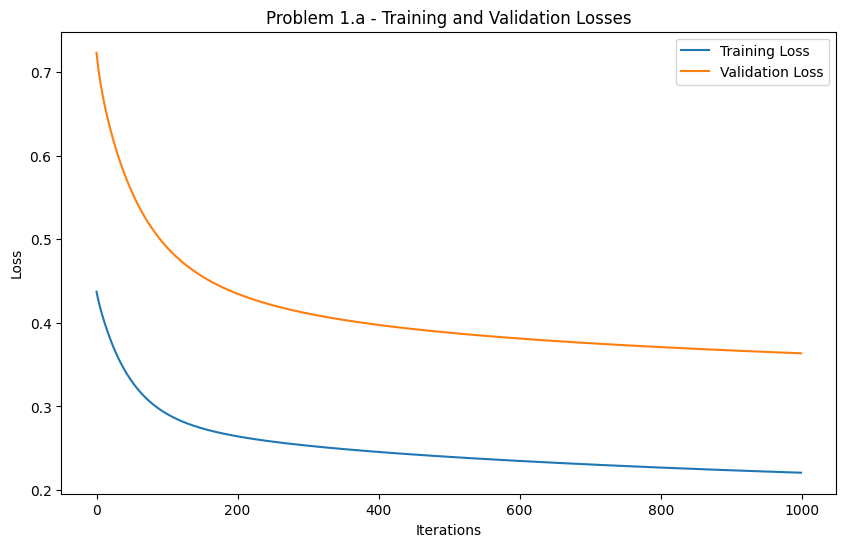

[P1.a]Theta:[-0.6676048   0.41227234 -0.13480065  0.39719397  0.26104236  0.16582258]
[P1.a]Final Training Loss:0.2206
[P1.a]Final Validation Loss:0.3636


In [ ]:
# Select features and target for Problem 1.a
features_1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

# Prepare input (X_1a) and target (y)
X_1a = df[features_1a].values
y = df[target].values

# Train-validation split
X_train_1a, X_val_1a, y_train_1a, y_val_1a = train_test_split(X_1a, y, test_size=0.20, random_state=42)

# Append intercept column
X_train_1a = append_intercept(X_train_1a)
X_val_1a = append_intercept(X_val_1a)

# Initialize theta to zeros
theta_1a = np.zeros(X_train_1a.shape[1])

# Hyperparameters
alpha_1a = 0.01
iterations = 1000

# Calculate gradient descent and get the training and validation losses
theta_1a, train_losses_1a, val_losses_1a = gradient_descent_train_val(
    X_train_1a, y_train_1a, X_val_1a, y_val_1a, theta_1a, alpha_1a, iterations, penalty=0)

# Plot graph
plot_loss_graph(train_losses_1a, val_losses_1a, 'Problem 1.a - Training and Validation Losses')

# Return the final results
print(f"[P1.a]Theta:{theta_1a}")
print(f"[P1.a]Final Training Loss:{train_losses_1a[-1]:.4f}")
print(f"[P1.a]Final Validation Loss:{val_losses_1a[-1]:.4f}")

### Problem 1.a: Compare different Learning Rates


Choose different learning rates between 0.1 and 0.01:
- **Learning Rate:** 0.1, 0.05, 0.01

[Choose Learning Rate: 0.1] Final Training Loss: 0.1933 | Final Validation Loss: 0.3283
[Choose Learning Rate:0.05] Final Training Loss: 0.1935 | Final Validation Loss: 0.3293
[Choose Learning Rate:0.01] Final Training Loss: 0.2035 | Final Validation Loss: 0.3437


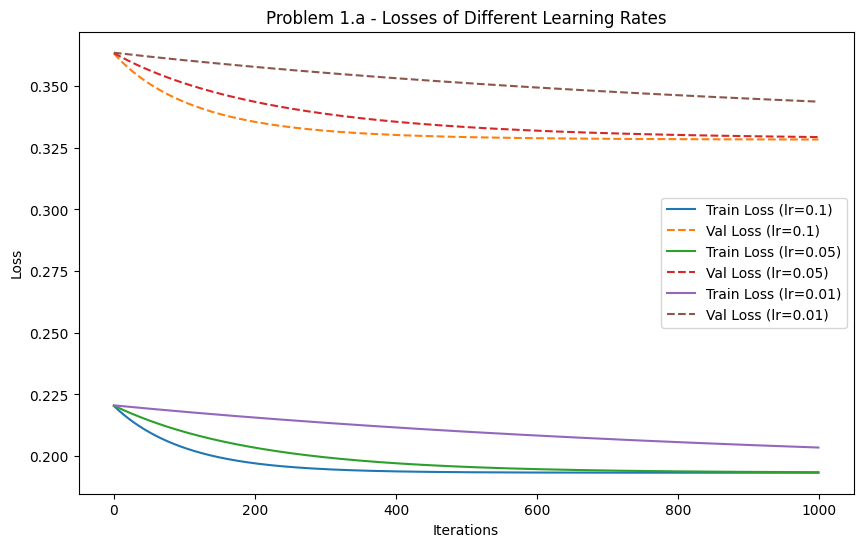

In [ ]:
# Choose different learning rates and record the results
learning_rates_list_1a = [0.1, 0.05, 0.01]
results_1a = {}

for lr in learning_rates_list_1a:
    theta, train_losses, val_losses = gradient_descent_train_val(
        X_train_1a, y_train_1a, X_val_1a, y_val_1a, theta_1a.copy(), lr, iterations, penalty=0)
    results_1a[lr] = {'theta': theta, 'train_losses': train_losses, 'val_losses': val_losses}
    print(f"[Choose Learning Rate:{lr:>4}] Final Training Loss: {train_losses[-1]:.4f} | Final Validation Loss: {val_losses[-1]:.4f}")

# Plot graph
plt.figure(figsize=(10,6))
for lr in learning_rates_list_1a:
    plt.plot(results_1a[lr]['train_losses'], label=f'Train Loss (lr={lr})')
    plt.plot(results_1a[lr]['val_losses'], '--', label=f'Val Loss (lr={lr})')
plt.title('Problem 1.a - Losses of Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Problem 1.b:
Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:
- **Features:** area, bedrooms, bathrooms, stories, main road, guestroom, basement, hot water heating, air conditioning, parking, prefarea

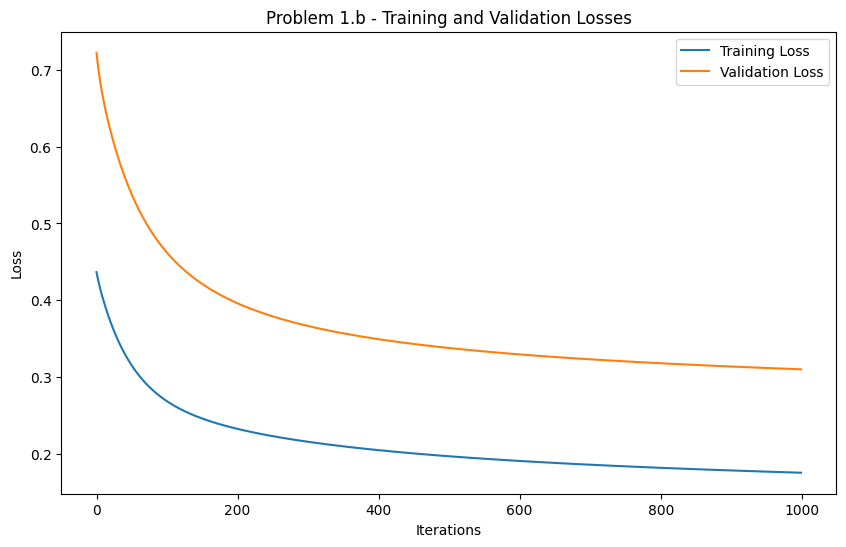

[P1.b]Theta:[-0.65454674  0.36403721 -0.17103945  0.36614717  0.24254537 -0.14003021
  0.14800365  0.21061602  0.11815049  0.4183703   0.14303158  0.27074918]
[P1.b]Final Training Loss:0.1757
[P1.b]Final Validation Loss:0.3103


In [ ]:
features_1b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
               'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

# Prepare input (X_1a) and target (y)
X_1b = df[features_1b].values
# use normlized y set before

# Train-validation split
X_train_1b, X_val_1b, y_train_1b, y_val_1b = train_test_split(X_1b, y, test_size=0.2, random_state=42)

# Append intercept column
X_train_1b = append_intercept(X_train_1b)
X_val_1b = append_intercept(X_val_1b)

# Initialize theta to zeros
theta_1b = np.zeros(X_train_1b.shape[1])

# Hyperparameters
alpha_1b = 0.01
iterations = 1000

# Calculate gradient descent and get the training and validation losses
theta_1b, train_losses_1b, val_losses_1b = gradient_descent_train_val(
    X_train_1b, y_train_1b, X_val_1b, y_val_1b, theta_1b, alpha_1b, iterations, penalty=0)

# Plot graph
plot_loss_graph(train_losses_1b, val_losses_1b, 'Problem 1.b - Training and Validation Losses')

# Return the final results
print(f"[P1.b]Theta:{theta_1b}")
print(f"[P1.b]Final Training Loss:{train_losses_1b[-1]:.4f}")
print(f"[P1.b]Final Validation Loss:{val_losses_1b[-1]:.4f}")

### Problem 1.b: Compare different Learning Rates


Choose different learning rates between 0.1 and 0.01:
- **Learning Rate:** 0.1, 0.05, 0.01

[Choose Learning Rate: 0.1] Final Training Loss: 0.1422 | Final Validation Loss: 0.2586
[Choose Learning Rate:0.05] Final Training Loss: 0.1433 | Final Validation Loss: 0.2630
[Choose Learning Rate:0.01] Final Training Loss: 0.1585 | Final Validation Loss: 0.2884


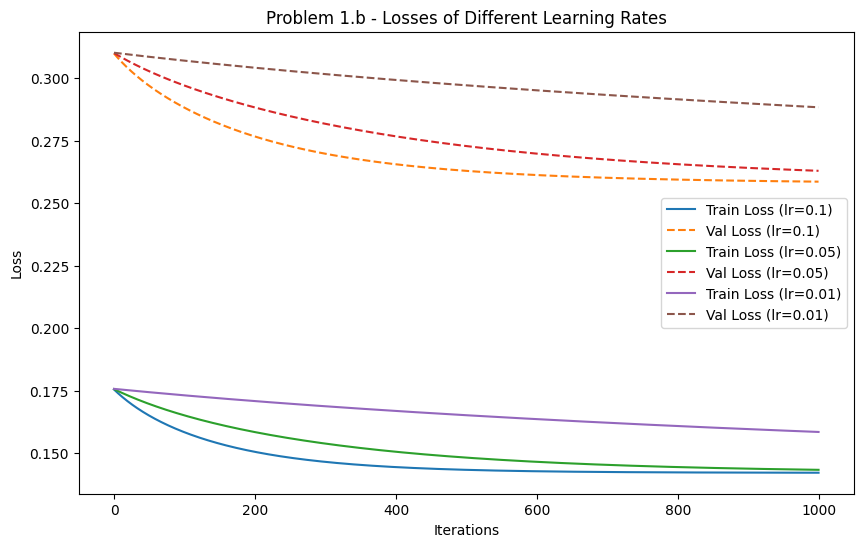

In [ ]:
learning_rates_list_1b = [0.1, 0.05, 0.01]
results_1b = {}

for lr in learning_rates_list_1b:
    theta, train_losses, val_losses = gradient_descent_train_val(
        X_train_1b, y_train_1b, X_val_1b, y_val_1b, theta_1b.copy(), lr, iterations, penalty=0)
    results_1b[lr] = {'theta': theta, 'train_losses': train_losses, 'val_losses': val_losses}
    print(f"[Choose Learning Rate:{lr:>4}] Final Training Loss: {train_losses[-1]:.4f} | Final Validation Loss: {val_losses[-1]:.4f}")

plt.figure(figsize=(10,6))
for lr in learning_rates_list_1b:
    plt.plot(results_1b[lr]['train_losses'], label=f'Train Loss (lr={lr})')
    plt.plot(results_1b[lr]['val_losses'], '--', label=f'Val Loss (lr={lr})')
plt.title('Problem 1.b - Losses of Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Conclusion: Comparison Between Problem 1.a and Problem 1.b


- For **Problem 1.a**, we used five numerical features: `area`, `bedrooms`, `bathrooms`, `stories`, and `parking`. The model showed steady convergence during training and validation. After tuning the learning rate and selecting an appropriate number of iterations, we were able to achieve a reasonable mean squared error (MSE). However, the model's predictive power was limited by the relatively small feature set, capturing only basic structural attributes of a house.
- In **Problem 1b**, we expanded the input features to include both numerical and categorical attributes, such as `main road`, `guestroom`, `basement`, `hot water heating`, `air conditioning`, and `prefarea`, in addition to the original five features. This enhanced the model's ability to understand more nuanced factors affecting housing price. As a result, the training and validation MSE were significantly lower compared to Problem 1a, demonstrating improved performance and better generalization.
- Based on the comparison of different learning rates, when learning rate set higher, the convergence become faster, but when it's set too high, it might vershooting the minimum.


## Problem 2: Predict housing price with Linear Regression (With Scaling)

In Problem 2, repeat problem 1, this time with input normalization and input standardization.

### Problem 2.a: Repeat problem 1.a with input normalization and input standardization

Perform two separate trainings for standardization and normalization.
- **Normalization:** Min-Max Scaling
- **Standardization:** Z-score Scaling

Problem 2a (Normalization) - Final theta: [-0.51507957  0.49890206  0.18009923  0.5718739   0.59035035  0.54987896]
Problem 2a (Normalization) - Final Training Loss: 0.28228678239084953
Problem 2a (Normalization) - Final Validation Loss: 0.48485328499548636
Problem 2a (Standardization) - Final theta: [-0.03221412  0.36376939  0.06092603  0.30234384  0.22681295  0.15442232]
Problem 2a (Standardization) - Final Training Loss: 0.1932933353158607
Problem 2a (Standardization) - Final Validation Loss: 0.32827727706869253


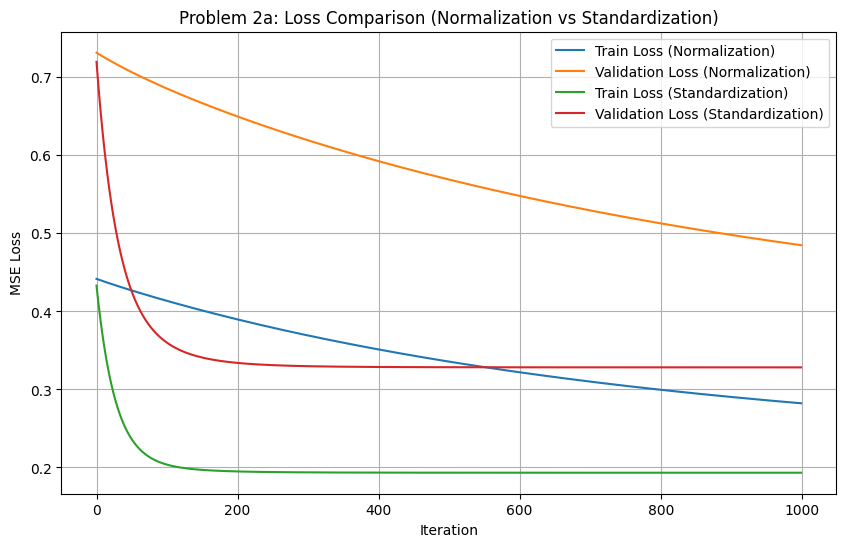

In [ ]:
# Problem 2.a: Normalization (Min-Max Scaling)
# Scale the features with MinMaxScaler
scaler_norm = MinMaxScaler()
X_train_norm_1a = scaler_norm.fit_transform(X_train_1a[:, 1:])
X_val_norm_1a = scaler_norm.transform(X_val_1a[:, 1:])

# Initialize theta to zeros
theta_norm_1a = np.zeros(X_train_norm_1a.shape[1])

# Append intercept column
X_train_norm_1a = append_intercept(X_train_norm_1a)
X_val_norm_1a = append_intercept(X_val_norm_1a)

# Train the model using gradient descent
theta_norm_1a, train_losses_norm_1a, val_losses_norm_1a = gradient_descent_train_val(
    X_train_norm_1a, y_train_1a, X_val_norm_1a, y_val_1a, theta_norm_1a, alpha_1a, iterations, penalty=0
)

# Return the final results
print(f"[P2.a Norm]Theta:{theta_norm_1a}")
print(f"[P2.a Norm]Final Training Loss:{train_losses_norm_1a[-1]:.4f}")
print(f"[P2.a Norm]Final Validation Loss:{val_losses_norm_1a[-1]:.4f}")

# Problem 2.a: Standardization (Z-score Scaling)
# Scale the features (excluding the intercept) using StandardScaler
scaler_std = StandardScaler()
X_train_std_1a = scaler_std.fit_transform(X_train_1a[:, 1:])
X_val_std_1a = scaler_std.transform(X_val_1a[:, 1:])

# Append intercept column
X_train_std_1a = append_intercept(X_train_std_1a)
X_val_std_1a = append_intercept(X_val_std_1a)

# Initialize theta to zeros
theta_std_1a = np.zeros(X_train_std_1a.shape[1])

theta_std_1a, train_losses_std_1a, val_losses_std_1a = gradient_descent_train_val(
    X_train_std_1a, y_train_1a, X_val_std_1a, y_val_1a, theta_std_1a, alpha_1a, iterations, penalty=0
)

# Return the final results
print(f"[P2.a Std]Theta:{theta_std_1a}")
print(f"[P2.a Std]Final Training Loss:{train_losses_std_1a[-1]:.4f}")
print(f"[P2.a Std]Final Validation Loss:{val_losses_std_1a[-1]:.4f}")

# Plotting graph
plt.figure(figsize=(10, 6))
plt.plot(train_losses_norm_1a, label='Train Loss(Norm)')
plt.plot(val_losses_norm_1a, label='Validation Loss(Norm)')
plt.plot(train_losses_std_1a, label='Train Loss(Std)')
plt.plot(val_losses_std_1a, label='Validation Loss(Std)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Problem 2.a - Loss Comparison(Normalization vs Standardization)')
plt.legend()
plt.show()


### Problem 2.a: Compare different Learning Rates


Choose different learning rates between 0.1 and 0.01:
- **Learning Rate:** 0.1, 0.05, 0.01

LR=0.1: Final Training Loss = 0.1945, Final Validation Loss = 0.3327
LR=0.05: Final Training Loss = 0.2034, Final Validation Loss = 0.3474
LR=0.01: Final Training Loss = 0.2823, Final Validation Loss = 0.4849


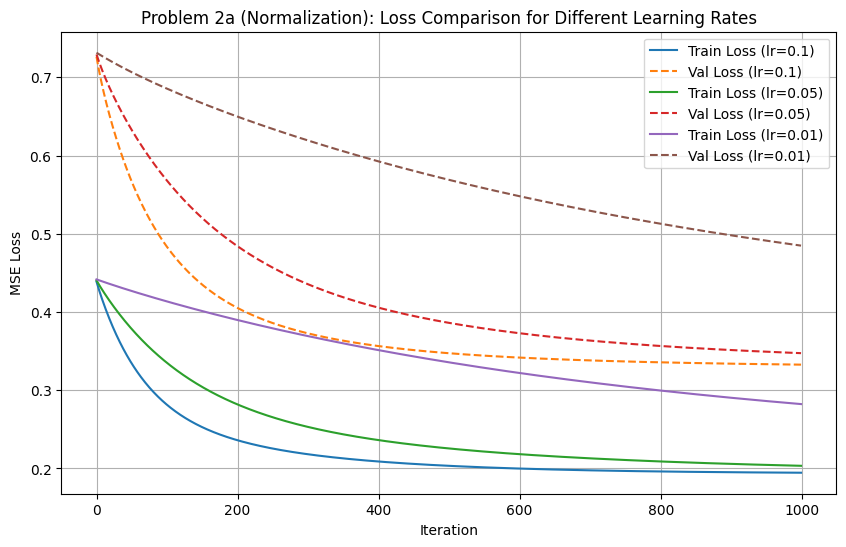

In [ ]:
learning_rates_list_2a = [0.1, 0.05, 0.01]
results_2a = {}

for lr in learning_rates_list_2a:
    theta, train_losses, val_losses = gradient_descent_train_val(
        X_train_norm_1a, y_train_1a, X_val_norm_1a, y_val_1a, theta_norm_1a.copy(), lr, iterations, penalty=0)
    results_2a[lr] = {'theta': theta, 'train_losses': train_losses, 'val_losses': val_losses}
    print(f"[Choose Learning Rate:{lr:>4}] Final Training Loss = {train_losses[-1]:.4f} | Final Validation Loss = {val_losses[-1]:.4f}")

plt.figure(figsize=(10, 6))
for lr in learning_rates_list_2a:
    plt.plot(results_2a[lr]['train_losses'], label=f'Train Loss (lr={lr})')
    plt.plot(results_2a[lr]['val_losses'], '--', label=f'Val Loss (lr={lr})')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Problem 2.a (Normalization) - Loss of Different Learning Rates')
plt.legend()
plt.show()

### Problem 2.b: Repeat problem 1.b with input normalization and input standardization

Perform two separate trainings for standardization and normalization.
- **Normalization:** Min-Max Scaling
- **Standardization:** Z-score Scaling

Problem 2b (Normalization) - Final theta: [-0.74362686  0.          0.36069628  0.04635854  0.50446154  0.45385407
  0.03215078  0.24564545  0.13719834  0.13753239  0.5791237   0.42508334
  0.36170159]
Problem 2b (Normalization) - Final Training Loss: 0.21101955001571865
Problem 2b (Normalization) - Final Validation Loss: 0.37189330289505884
Problem 2b (Standardization) - Final theta: [-0.03221412  0.          0.27938175  0.03245955  0.28302211  0.19445413
  0.07761867  0.05068891  0.11047221  0.08355648  0.20006995  0.11311974
  0.14425594]
Problem 2b (Standardization) - Final Training Loss: 0.1421038830193262
Problem 2b (Standardization) - Final Validation Loss: 0.25774716129037545


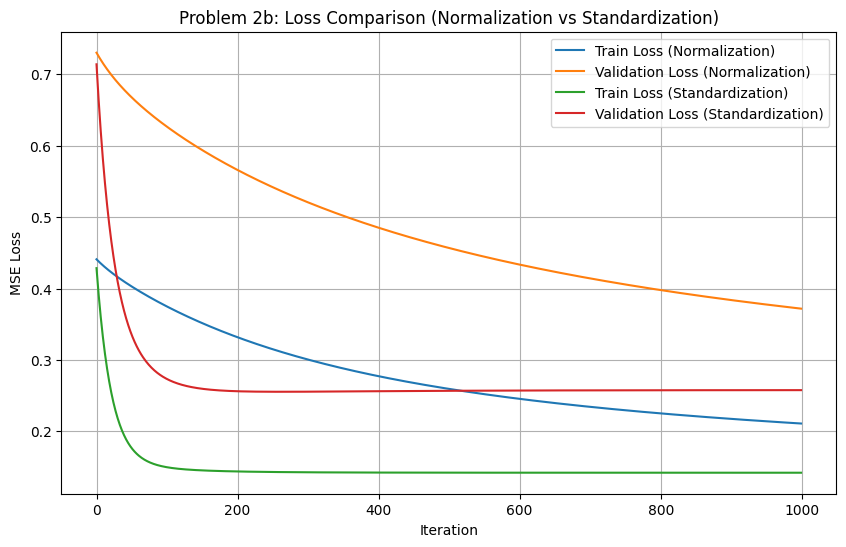

In [ ]:
# Problem 2.b: Normalization (Min-Max Scaling)
scaler_norm_b = MinMaxScaler()
# Scale entire feature matrix (all features for Problem 1b)
X_train_1b_norm = scaler_norm_b.fit_transform(X_train_1b)
X_val_1b_norm = scaler_norm_b.transform(X_val_1b)

# Add intercept term back.
X_train_1b_norm = append_intercept(X_train_1b_norm)
X_val_1b_norm = append_intercept(X_val_1b_norm)

theta_norm_1b = np.zeros(X_train_1b_norm.shape[1])

theta_norm_1b, train_losses_norm_1b, val_losses_norm_1b = gradient_descent_train_val(
    X_train_1b_norm, y_train_1b, X_val_1b_norm, y_val_1b, theta_norm_1b, alpha_1b, iterations, penalty=0
)

# Return the final results
print(f"[P2.b Norm]Theta:{theta_norm_1b}")
print(f"[P2.b Norm]Final Training Loss:{train_losses_norm_1b[-1]:.4f}")
print(f"[P2.b Norm]Final Validation Loss:{val_losses_norm_1b[-1]:.4f}")


# Problem 2.b: Standardization (Z-score Scaling)
scaler_std_b = StandardScaler()
X_train_1b_std = scaler_std_b.fit_transform(X_train_1b)
X_val_1b_std = scaler_std_b.transform(X_val_1b)

X_train_1b_std = append_intercept(X_train_1b_std)
X_val_1b_std = append_intercept(X_val_1b_std)

theta_std_1b = np.zeros(X_train_1b_std.shape[1])

theta_b_std, train_losses_b_std, val_losses_b_std = gradient_descent_train_val(
    X_train_1b_std, y_train_1b, X_val_1b_std, y_val_1b, theta_std_1b, alpha_1b, iterations, penalty=0
)

# Return the final results
print(f"[P2.a Norm]Theta:{theta_norm_1a}")
print(f"[P2.a Norm]Final Training Loss:{train_losses_norm_1a[-1]:.4f}")
print(f"[P2.a Norm]Final Validation Loss:{val_losses_norm_1a[-1]:.4f}")

print("Problem 2b (Standardization) - Final theta:", theta_b_std)
print("Problem 2b (Standardization) - Final Training Loss:", train_losses_b_std[-1])
print("Problem 2b (Standardization) - Final Validation Loss:", val_losses_b_std[-1])


# Plotting graph
plt.figure(figsize=(10, 6))
plt.plot(train_losses_norm_1b, label='Train Loss (Normalization)')
plt.plot(val_losses_norm_1b, label='Validation Loss (Normalization)')
plt.plot(train_losses_b_std, label='Train Loss (Standardization)')
plt.plot(val_losses_b_std, label='Validation Loss (Standardization)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Problem 2.b - Loss Comparison(Normalization vs Standardization)')
plt.legend()
plt.show()


### Problem 2.b: Compare different Learning Rates


Choose different learning rates between 0.1 and 0.01:
- **Learning Rate:** 0.1, 0.05, 0.01

LR=0.1: Final Training Loss = 0.1431, Final Validation Loss = 0.2578
LR=0.05: Final Training Loss = 0.1496, Final Validation Loss = 0.2639
LR=0.01: Final Training Loss = 0.2110, Final Validation Loss = 0.3719


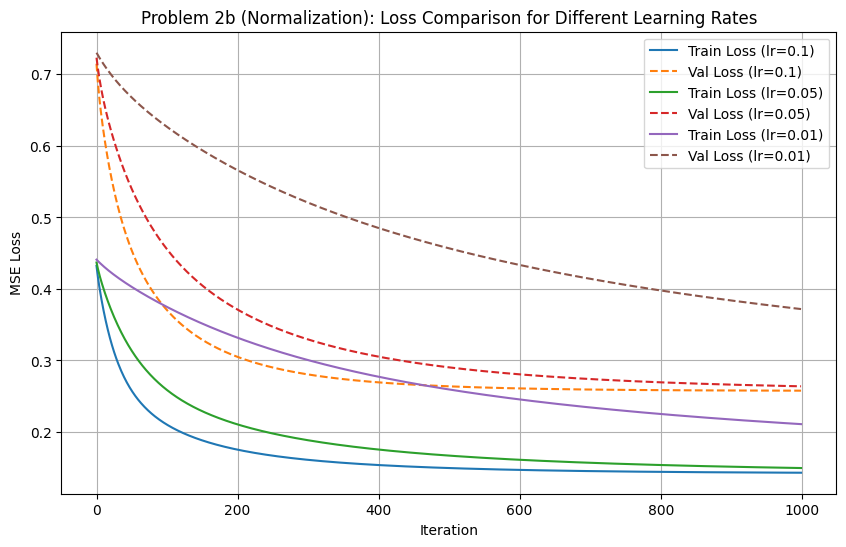

In [ ]:
learning_rates_list_2b = [0.1, 0.05, 0.01]
results_2b = {}

for lr in learning_rates_list_2b:
    theta, train_losses, val_losses = gradient_descent_train_val(
        X_train_1b_norm, y_train_1b, X_val_1b_norm, y_val_1b, theta_norm_1b.copy(), lr, iterations, penalty=0)
    results_2b[lr] = {'theta': theta, 'train_losses': train_losses, 'val_losses': val_losses}
    print(f"[Choose Learning Rate:{lr:>4}] Final Training Loss = {train_losses[-1]:.4f} | Final Validation Loss = {val_losses[-1]:.4f}")

plt.figure(figsize=(10,6))
for lr in learning_rates_list_2b:
    plt.plot(results_2b[lr]['train_losses'], label=f'Train Loss (lr={lr})')
    plt.plot(results_2b[lr]['val_losses'], '--', label=f'Val Loss (lr={lr})')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Problem 2.b (Normalization) - Loss of Different Learning Rates')
plt.legend()
plt.show()

### Conclusion: Comparison Between Problems 1a, 1b, 2a, and 2b

This assignment explored linear regression using gradient descent to predict housing prices across four scenarios: with different feature sets and with/without feature scaling techniques.

---

#### **Problem 1a vs Problem 1b**

- **Problem 1a** used a limited set of numerical features: `area`, `bedrooms`, `bathrooms`, `stories`, and `parking`. The model showed reasonable convergence and a moderate training/validation error. However, its predictive power was constrained by the small number of features.
  
- **Problem 1b** expanded the feature set to include both numerical and categorical attributes, such as `main road`, `guestroom`, `basement`, `hot water heating`, `air conditioning`, and `prefarea`. This broader set improved model performance significantly, reducing MSE on both training and validation sets and highlighting the importance of informative and diverse input features.

---

#### **Problem 2a: Effect of Scaling on Problem 1a**

- In **Problem 2a**, we revisited the simpler feature set of Problem 1a but introduced two preprocessing strategies: **normalization** (min-max scaling) and **standardization** (z-score).
  
- Both scaling methods improved model training compared to the unscaled baseline. Standardization yielded smoother and faster convergence, with lower final MSE, likely due to better numerical stability during gradient descent.
  
- **Standardization outperformed normalization and the baseline** in both training and validation accuracy, indicating it was the most effective approach for this feature set.

---

#### **Problem 2b: Effect of Scaling on Problem 1b**

- **Problem 2b** applied the same scaling strategies to the richer feature set from Problem 1b. As with 2a, both normalization and standardization improved convergence and reduced training/validation error compared to the baseline.
  
- Again, **standardization produced the best overall results**, achieving the lowest MSE and the most stable training trajectory. Normalization performed well but was slightly less consistent across iterations.
  
- The benefit of scaling was more noticeable in Problem 2b due to the increased feature dimensionality, which magnifies the effect of different feature scales during optimization.

---

#### **Overall Observations**

- **Feature richness (1b vs 1a)** has a large impact on performance.
- **Input scaling (2a/2b)** significantly improves gradient descent efficiency and model accuracy.
- **Standardization** consistently led to the best training outcomes across both simpler and more complex feature sets.

These results emphasize the importance of both thoughtful feature selection and proper preprocessing in building effective machine learning models.

## Problem 3: Use Penalty for Linear Regression

## Problem 3.a: Use L2-Regularized Model in Problem 1.a

Repeat problem 2.a, this time by adding parameters penalty to loss function.

Problem 3a (L2 Penalty = 0.1) - Final theta: [-0.03221412  0.36369549  0.06096222  0.30228982  0.22676905  0.15441924]
Problem 3a - Final Training Loss: 0.19332807775513466
Problem 3a - Final Validation Loss: 0.3284324875475124


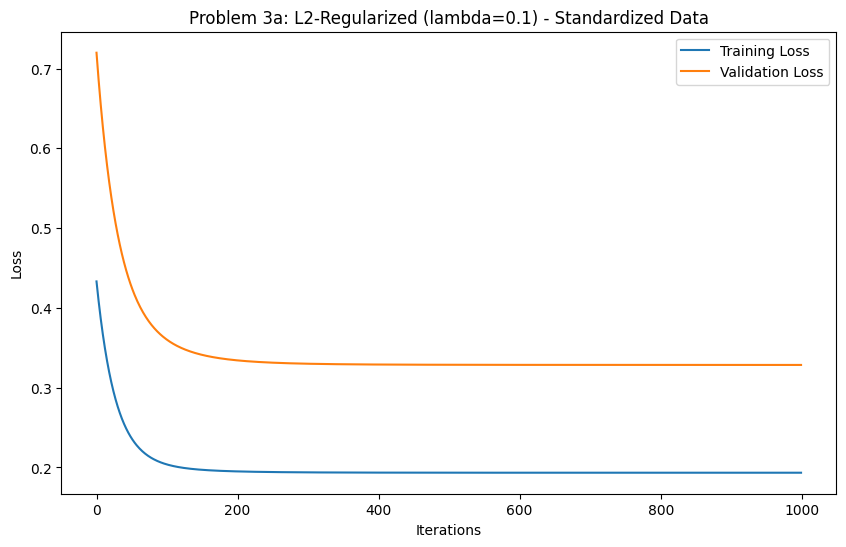

In [ ]:
# Set regularization strength
lambda_reg_3a = 0.1

# Reusing X_train_std_1a, X_val_std_1a, y_train_1a, y_val_1a, alpha_1a, and iterations from Problem 2a
theta_initial_3a = np.zeros(X_train_std_1a.shape[1])

theta_3a, train_losses_3a, val_losses_3a = gradient_descent_train_val(
    X_train_std_1a, y_train_1a, X_val_std_1a, y_val_1a,
    theta_initial_3a, alpha_1a, iterations, penalty=lambda_reg_3a
)

print("Penalty:",lambda_reg_3a)
print("Theta:", theta_3a)
print("Final Training Loss:", train_losses_3a[-1])
print("Final Validation Loss:", val_losses_3a[-1])

# Plot graph
plot_loss_graph(train_losses_3a, val_losses_3a,
                 f"Problem 3a: L2-Regularized (lambda={lambda_reg_3a}) - Standardized Data")

## Problem 3。b: Use L2-Regularized Model in Problem 1b

Repeat problem 2。b, this time by adding parameters penalty to loss function.

Problem 3b (L2 Penalty = 0.1) - Final theta: [-0.03221412  0.          0.2793276   0.03250431  0.28296912  0.19441256
  0.07762995  0.05070724  0.11044188  0.08353569  0.20004812  0.11312427
  0.14423243]
Problem 3b - Final Training Loss: 0.14213818200785372
Problem 3b - Final Validation Loss: 0.2578927407931176


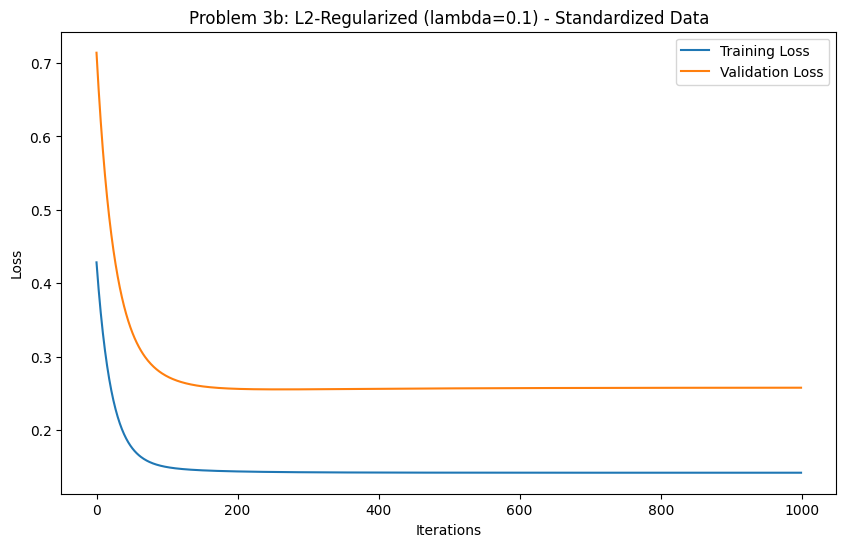

In [ ]:
# Set a regularization strength
lambda_reg_3b = 0.1

# Reusing X_train_1b_std, X_val_1b_std, y_train_1b, y_val_1b, alpha_1b, and iterations from Problem 2b
theta_initial_3b = np.zeros(X_train_1b_std.shape[1])

theta_3b, train_losses_3b, val_losses_3b = gradient_descent_train_val(
    X_train_1b_std, y_train_1b, X_val_1b_std, y_val_1b,
    theta_initial_3b, alpha_1b, iterations, penalty=lambda_reg_3b
)

print("Penalty:",lambda_reg_3b)
print("Final theta:", theta_3b)
print("Final Training Loss:", train_losses_3b[-1])
print("Final Validation Loss:", val_losses_3b[-1])

# Plot graph
plot_loss_graph(train_losses_3b, val_losses_3b,
                 f"Problem 3b: L2-Regularized (lambda={lambda_reg_3b}) - Standardized Data")

### Problem 3: Comparing Different Regularization Strengths

Lambda=0.1 => Final Train Loss=0.1933, Val Loss=0.3284
Lambda=0.05 => Final Train Loss=0.1933, Val Loss=0.3284
Lambda=0.01 => Final Train Loss=0.1933, Val Loss=0.3283


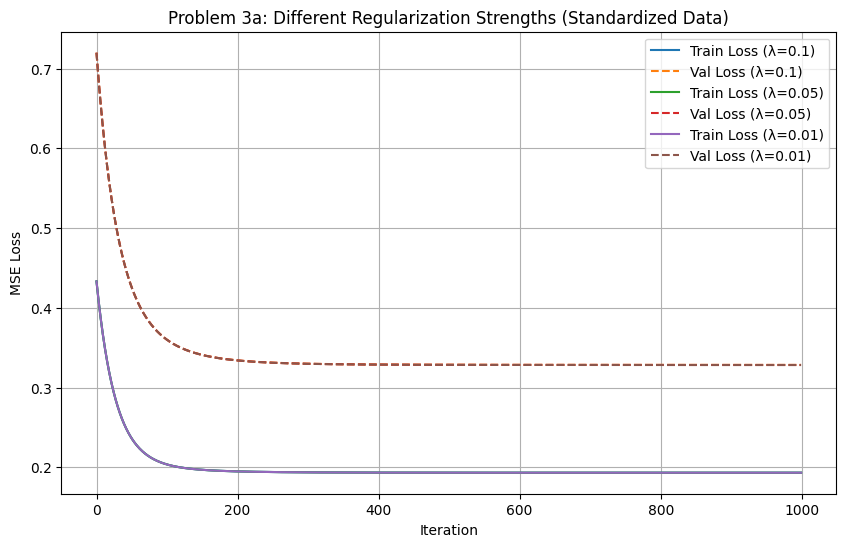

In [ ]:
lambda_values_list = [0.1, 0.05, 0.01]
results_3a = {}

for lam in lambda_values_list:
    theta_temp, train_loss_temp, val_loss_temp = gradient_descent_train_val(
        X_train_std_1a, y_train_1a, X_val_std_1a, y_val_1a,
        theta_initial_3a.copy(), alpha_1a, iterations, penalty=lam
    )
    results_3a[lam] = {
        'theta': theta_temp,
        'train_losses': train_loss_temp,
        'val_losses': val_loss_temp
    }
    print(f"[Lambda={lam}] Final Train Loss:{train_loss_temp[-1]:.4f} | Val Loss={val_loss_temp[-1]:.4f}")

plt.figure(figsize=(10,6))
for lam in lambda_values_list:
    plt.plot(results_3a[lam]['train_losses'], label=f'Train Loss (λ={lam})')
    plt.plot(results_3a[lam]['val_losses'], '--', label=f'Val Loss (λ={lam})')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Problem 3a - Different Regularization Strengths (Standardized Data)')
plt.legend()
plt.show()

### Conclusions for Problem 3

- **Problem 3a (L2-Regularized Model from Problem 1a Feature Set)**  
   - Compared to **Problem 2a (Standardization)** without regularization, the training and validation losses remained nearly identical (~0.193 and ~0.328).  
   - Exploring different regularization strengths (\(\lambda = 0.1, 0.05, 0.01\)) yielded very similar outcomes, suggesting that for this dataset and feature set, small to moderate L2 penalties had minimal effect on model performance.

- **Problem 3b (L2-Regularized Model from Problem 1b Feature Set)**  
   - With \(\lambda = 0.1\), the training loss was **0.1421** and the validation loss was **0.2579**, which are almost the same as the losses in **Problem 2b (Standardization)** without regularization (**0.142** and **0.257**).  
   - This indicates that moderate regularization did not significantly impact performance, likely due to the model not overfitting or the regularization strength being too small to influence learning meaningfully.

- **Effect of Regularization Strength (\(\lambda\))**  
   - Testing \(\lambda = 0.1, 0.05, 0.01\) in Problem 3a consistently resulted in final losses around **0.193** (train) and **0.328** (validation), indicating low sensitivity in this range.  
   - To better understand the impact of regularization, it may be useful to explore larger \(\lambda\) values (e.g., 1.0 or 10.0) and observe how they influence the bias–variance trade-off.

